In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_均匀数据/数值实验结果_pullsum/Ring3, n=20, lr=0.0008, batch_size=128.csv")
df2=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_均匀数据/数值实验结果_pulldiag/Ring3, n=20, lr=0.0008, batch_size=128.csv")
df3=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_均匀数据/数值实验结果_frsd/Ring3, n=20, lr=0.001, beta=0.1, batch_size=128.csv")
df4=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_均匀数据/数值实验结果_frozen/Ring4, n=20, lr=0.0009, beta=0.1, batch_size=128.csv")

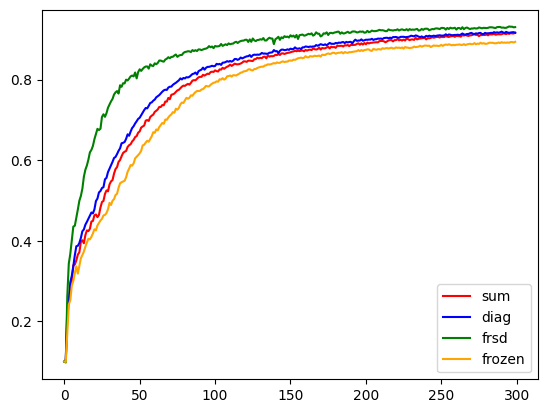

In [3]:
a=300
plt.plot(df1["Test_Accuracy"][:a],color='r',label='sum')
plt.plot(df2["Test_Accuracy"][:a],color='b',label='diag')
plt.plot(df3["Test_Accuracy"][:a],color='g',label='frsd')
plt.plot(df4["Test_Accuracy"][:a],color='orange',label='frozen')
plt.legend()
plt.show()

In [4]:
Sum_aa1=df1["Test_Accuracy"]
Diag_aa1=df2["Test_Accuracy"]
FRSD_aa1=df3["Test_Accuracy"]
FROZEN_aa1=df4["Test_Accuracy"]

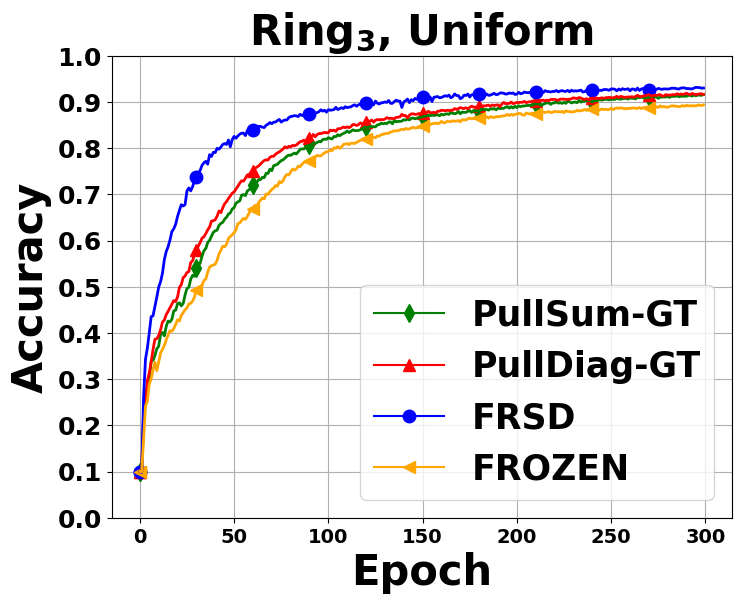

In [5]:
# plot the results
from matplotlib.font_manager import FontProperties
import numpy as np
a=300
grads = [Sum_aa1[:a], Diag_aa1[:a], FRSD_aa1[:a], FROZEN_aa1[:a]]
legend = ['PullSum-GT', 'PullDiag-GT', 'FRSD', 'FROZEN']
title = r"Ring$\mathbf{_3}$, Uniform"
save = '/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/画图/PDF/Ring_3, 均匀数据.pdf'
ylabel = 'Accuracy'

plt.rcParams['figure.figsize'] = 8, 6
plt.figure()
xlen = len(grads[0])
colors = ['green', 'red', 'blue', 'orange', 'purple', 'cyan']
markers = ['d', '^', 'o', '<', '*', 's']
idx_set = np.arange(0, xlen, xlen // 10)

for i in range(len(grads)):
    plt.plot(0, grads[i][0], color=colors[i], marker=markers[i], markersize=9)

for i in range(len(grads)):
    for idx in idx_set:
        plt.plot(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=9, linestyle='None')

for i in range(len(grads)):
    plt.plot(np.arange(xlen), grads[i], linewidth=2.0, color=colors[i])

font_properties = FontProperties(weight='bold', size=25)
plt.legend(legend,prop=font_properties)
plt.xlabel('Epoch', fontsize=30, fontweight='bold')
plt.ylabel(ylabel, fontsize=30, fontweight='bold')
plt.title(title, fontsize=30, fontweight='bold') 
plt.grid(True)

# Set denser y-ticks
y_ticks = np.arange(0, 1.1, 0.1)  # Adjust this range and step as needed
plt.yticks(y_ticks, fontsize=18,fontweight='bold')

plt.xticks(fontsize=14,fontweight='bold')
plt.savefig(save, bbox_inches='tight')
plt.show()